### Part 1 — Fashion MNIST CNN using Keras

### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load and Prepare Data

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Build Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compile Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.7807 - loss: 0.6037 - val_accuracy: 0.8731 - val_loss: 0.3422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8864 - loss: 0.3100 - val_accuracy: 0.8989 - val_loss: 0.2924
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9077 - loss: 0.2526 - val_accuracy: 0.9002 - val_loss: 0.2725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9178 - loss: 0.2189 - val_accuracy: 0.9021 - val_loss: 0.2655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9272 - loss: 0.1959 - val_accuracy: 0.9086 - val_loss: 0.2605
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9386 - loss: 0.1653 - val_accuracy: 0.9065 - val_loss: 0.2574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9446 - loss: 0.1491 - val_accuracy: 0.9152 - val_loss: 0.2458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9509 -

### Evaluate Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', round(test_acc*100, 2), '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9049 - loss: 0.3112
Test Accuracy: 90.61 %


### Show Some Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


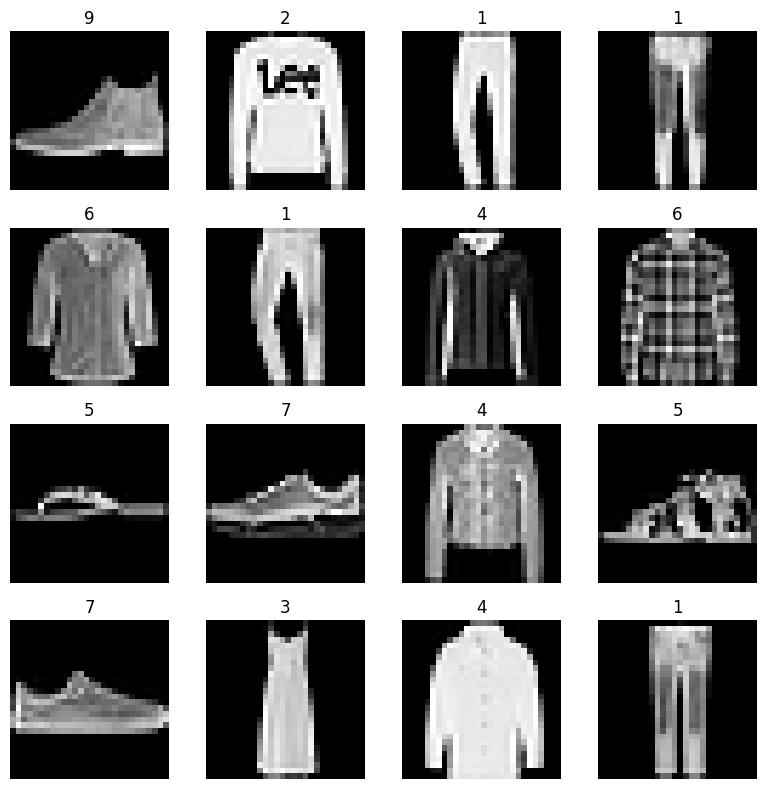

In [7]:
predictions = model.predict(x_test[:16])
plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()

### Plot Training Results

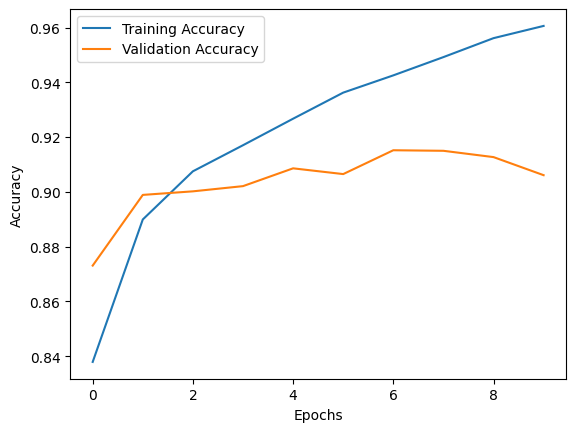

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()